In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [22]:
file='/home/elivelton/UFBA/simulator/docker-veins-v4/data/ev_sbesc/ev_sbesc/examples/ev_sbesc/results/analysis_file.csv'

In [23]:
dataset = pd.read_csv(file)

In [4]:
dataset.tail()

,run,type,module,name,attrname,attrvalue,value
8748,WithoutControl-0-20210813-16:19:10-22585,attr,DefaultScenario.rsu[8].nic.mac1609_4,sentPackets:count,source,org_car2x_veins_modules_mac_sigSentPacket,NaN
8749,WithoutControl-0-20210813-16:19:10-22585,scalar,DefaultScenario.rsu[8].nic.mac1609_4,collisions:count,NaN,NaN,0.0
8750,WithoutControl-0-20210813-16:19:10-22585,attr,DefaultScenario.rsu[8].nic.mac1609_4,collisions:count,source,org_car2x_veins_modules_mac_sigCollision,NaN
8751,WithoutControl-0-20210813-16:19:10-22585,scalar,DefaultScenario.rsu[8].nic.mac1609_4,channelBusy:timeavg,NaN,NaN,0.0
8752,WithoutControl-0-20210813-16:19:10-22585,attr,DefaultScenario.rsu[8].nic.mac1609_4,channelBusy:timeavg,source,org_car2x_veins_modules_mac_sigChannelBusy,NaN


In [ ]:
# pd.set_option('display.width', 180)
# pd.set_option('display.max_colwidth', 100)

In [24]:
ds_with = dataset[(dataset['type'] == 'scalar') & (dataset['run'] == dataset['run'].unique()[0])]
ds_without = dataset[(dataset['type'] == 'scalar') &  (dataset['run'] == dataset['run'].unique()[1])]

In [25]:
ds_with_plot = ds_with[ds_with['module'].str.contains('veinsmobility')]
ds_without_plot = ds_without[ds_without['module'].str.contains('veinsmobility')]

In [26]:
ds_with_plot = ds_with_plot[['module', 'name', 'value']]
ds_without_plot = ds_without_plot[['module', 'name', 'value']]

In [27]:
ev_with = ds_with_plot[ds_with_plot['module'].str.contains('evNode')]
ev_without = ds_without_plot[ds_without_plot['module'].str.contains('evNode')]

In [28]:
general_with = pd.concat([ds_with_plot, ev_with]).drop_duplicates(keep=False)
general_without = pd.concat([ds_without_plot, ev_without]).drop_duplicates(keep=False)

In [71]:
def replace_ev_nodes(module_name):
    if 'veinsmobility' in module_name:
        return re.search('Scenario.evNode(.+?).veinsmobility', module_name).group(1)
    return module_name
def replace_nodes(module_name):
    if 'veinsmobility' in module_name:
        return re.search('Scenario.node(.+?).veinsmobility', module_name).group(1)
    return module_name

def get_ds_to_plot(ds_with, ds_without, withModule=False, method=replace_ev_nodes):
    keys = 'name'
    if withModule:
        keys = ['module', 'name']
        ds_with['module'] = ds_with['module'].apply(method)
        ds_without['module'] = ds_without['module'].apply(method)
    ds = pd.merge(ds_with, ds_without, how='inner', on=keys)
    ds = ds.rename(columns={'value_x': 'with optimization', 'value_y': 'without optimization'})
    ds = ds[ds['name'] != 'totalDistance']

    if withModule:
        # ds['module'] = ds['module'] + '.' + ds['name']
        ds = ds.set_index(['module'])
    else:
        ds = ds.set_index('name')
    return ds


def plot_chart(df):
    ax = df.plot(kind='bar', grid=True, rot=0)
    # ax.axes.get_xaxis().set_ticks([])
    # ax.axes.get_xaxis().set_visible(False)
    # ax.set_xlabel("EV nodes")
    ax.set_ylabel("Total travel time (in seconds)")
    # ax.set_ylabel("Total CO2 emission")

In [105]:
items = ['totalTime', 'totalCO2Emission']

module = 'totalTime'

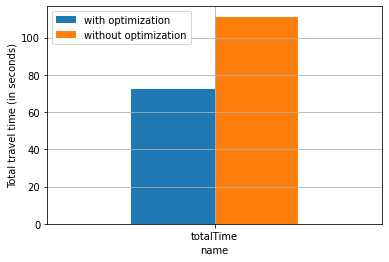

In [112]:
ev_with_mean = ev_with.drop(columns=['module']).groupby(by=['name'], as_index=False).mean()
ev_with_mean = ev_with_mean[ev_with_mean['name'] == module]
ev_without_mean = ev_without.drop(columns=['module']).groupby(by=['name'], as_index=False).mean()

df_plot_mean = get_ds_to_plot(ev_with_mean, ev_without_mean)
plot_chart(df_plot_mean)

<ipython-input-71-947902aeb5d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_with['module'] = ds_with['module'].apply(method)
<ipython-input-71-947902aeb5d3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_without['module'] = ds_without['module'].apply(method)


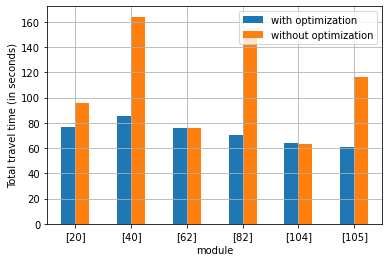

In [107]:
ev_with_tt = ev_with[ev_with['name'] == 'totalTime']
ev_without_tt = ev_without[ev_without['name'] == module]
df_plot = get_ds_to_plot(ev_with_tt, ev_without_tt, withModule=True)
plot_chart(df_plot)

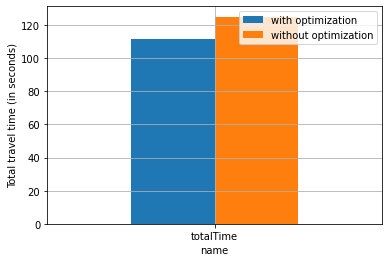

In [108]:
general_with_mean = general_with.drop(columns=['module']).groupby(by=['name'], as_index=False).mean()
general_without_mean = general_without.drop(columns=['module']).groupby(by=['name'], as_index=False).mean()
general_without_mean = general_without_mean[general_without_mean['name'] == module]
df_plot_mean_g = get_ds_to_plot(general_with_mean, general_without_mean)
plot_chart(df_plot_mean_g)

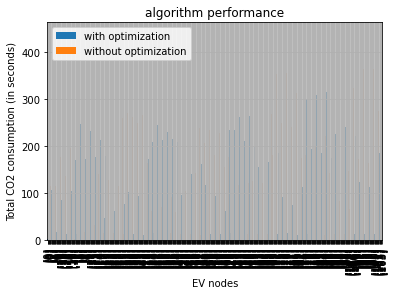

In [33]:
df_plot_g = get_ds_to_plot(general_with, general_without, withModule=True, method=replace_nodes)
plot_chart(df_plot_g)

In [115]:

dm1 = df_plot_mean
dm2 = df_plot_mean_g

# dm1 = dm1.rename(columns={'totalTime': 'with optimization'})

# dm = pd.merge(dm1, dm2, how='inner', on='name')
# dm

In [116]:
dm1 = dm1.rename(index={module:'EV'})
dm1

,with optimization,without optimization
name,,
EV,72.166667,111.166667


In [117]:
dm2 = dm2.rename(index={module:'Passenger'})
dm2

,with optimization,without optimization
name,,
Passenger,111.46,125.12


In [118]:
dm = dm1.append(dm2)
dm

,with optimization,without optimization
name,,
EV,72.166667,111.166667
Passenger,111.460000,125.120000


Text(0, 0.5, 'Total CO2 emission')

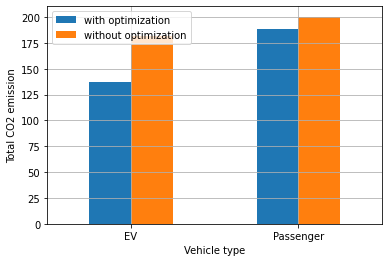

In [98]:
ax = dm.plot(kind='bar', grid=True, rot=0)
ax.set_xlabel("Vehicle type")
# ax.set_ylabel("Total travel time (in seconds)")
ax.set_ylabel("Total CO2 emission")